In [34]:
#1) Loading libraries and dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"/Users/niccolocomar/Documents/Kaggle/London bike sharing dataset/london_merged.csv", parse_dates=['timestamp'])

In [35]:
#2) Dataset exploration

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [36]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [41]:
#3) Analysis per dates

df['timestamp'] = pd.to_datetime(df['timestamp'])

In [42]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
year                     int64
month                    int64
dayofweek                int64
hour                     int64
dtype: object

In [43]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


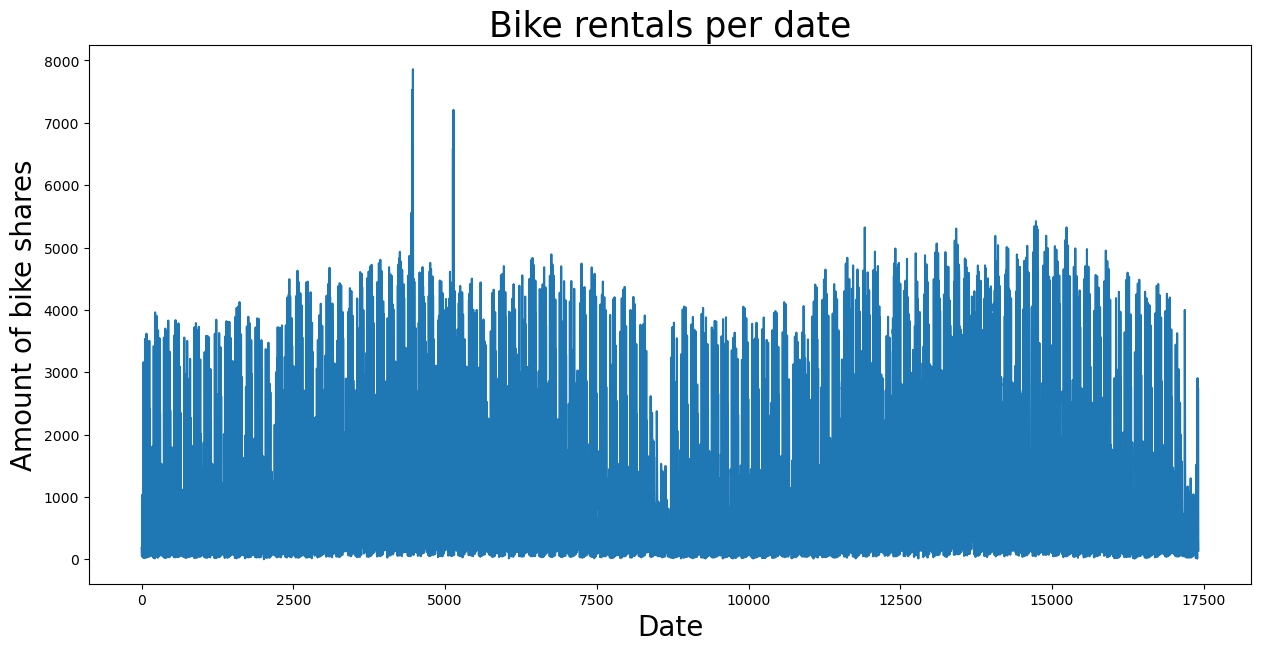

In [40]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x=df.index, y=df.cnt,data=df)
ax.set_title("Bike rentals per date", fontsize=25)
ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

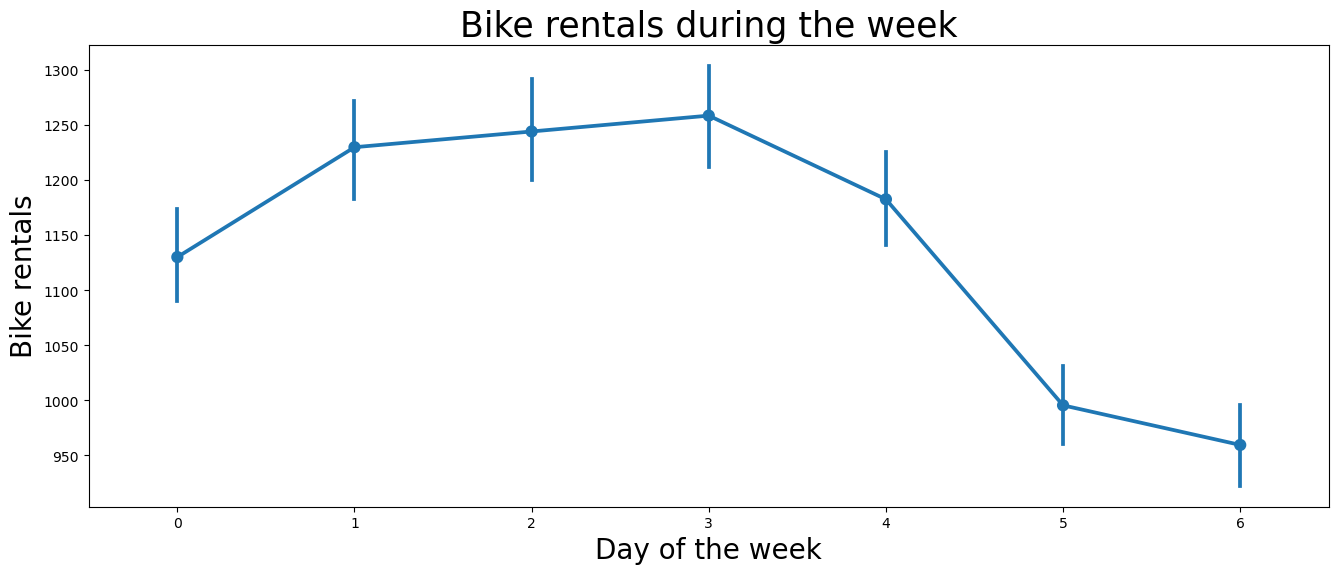

In [44]:
plt.figure(figsize=(16, 6))
ax = sns.pointplot(x='dayofweek', y='cnt',data=df)
ax.set_title("Bike rentals during the week", fontsize=25)
ax.set_xlabel("Day of the week", fontsize=20)
ax.set_ylabel('Bike rentals', fontsize=20)
plt.show()

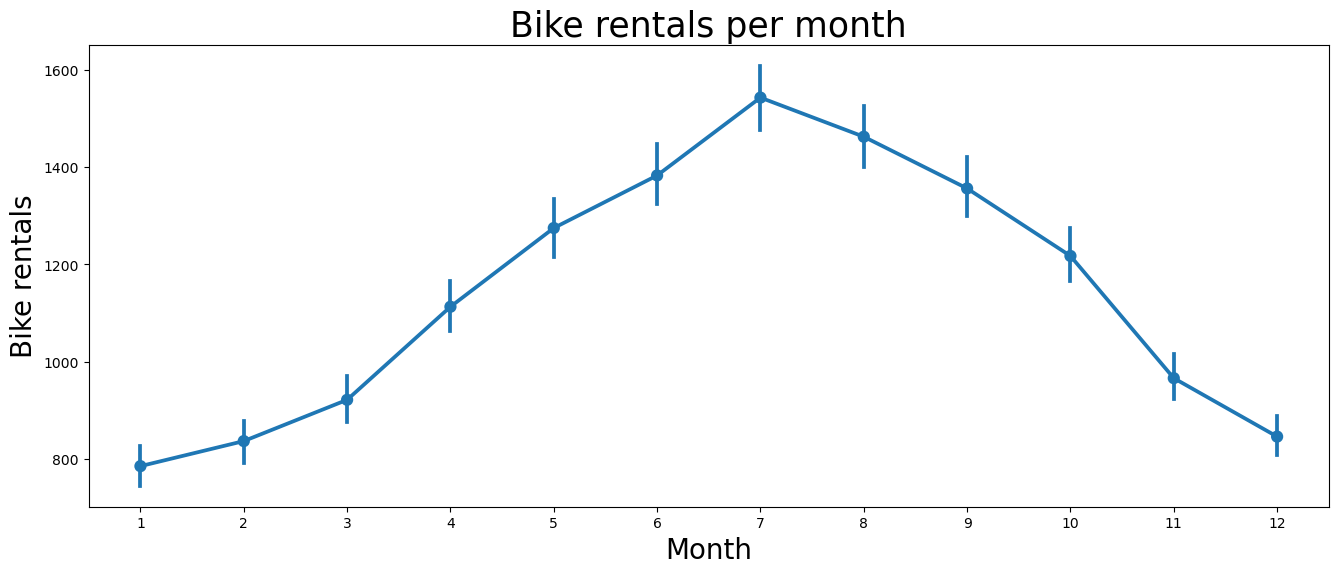

In [45]:
plt.figure(figsize=(16, 6))
ax = sns.pointplot(x='month', y='cnt',data=df)
ax.set_title("Bike rentals per month", fontsize=25)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel("Bike rentals", fontsize=20)
plt.show()

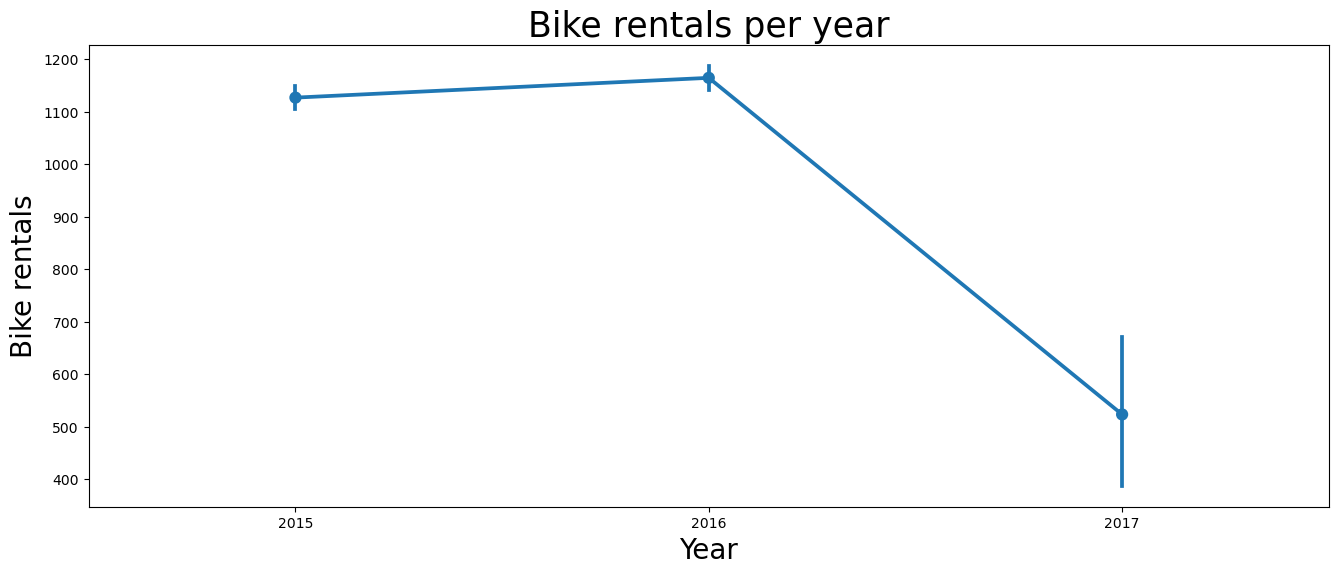

In [46]:
plt.figure(figsize=(16, 6))
ax = sns.pointplot(x='year', y='cnt',data=df)
ax.set_title("Bike rentals per year", fontsize=25)
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Bike rentals", fontsize=20)
plt.show()

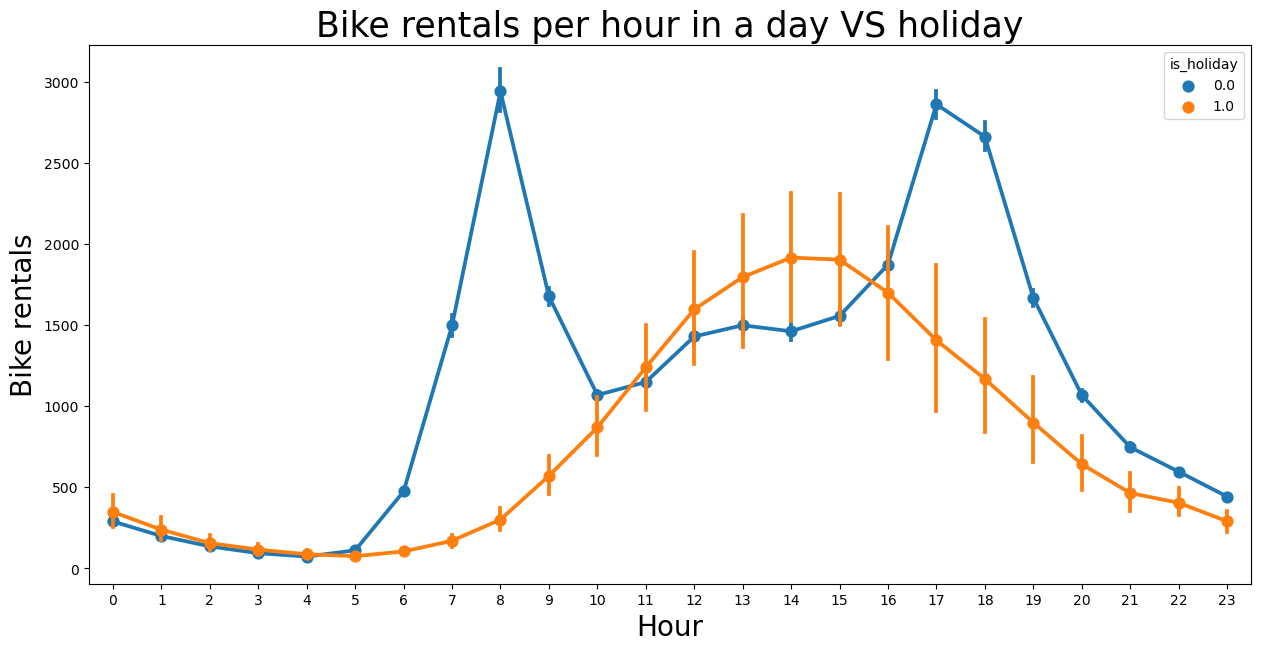

In [52]:
plt.figure(figsize=(15, 7))
ax = sns.pointplot(x='hour', y='cnt',hue='is_holiday',data=df)
ax.set_title("Bike rentals per hour in a day VS holiday", fontsize=25)
ax.set_xlabel("Hour", fontsize=20)
ax.set_ylabel('Bike rentals', fontsize=20)
plt.show()

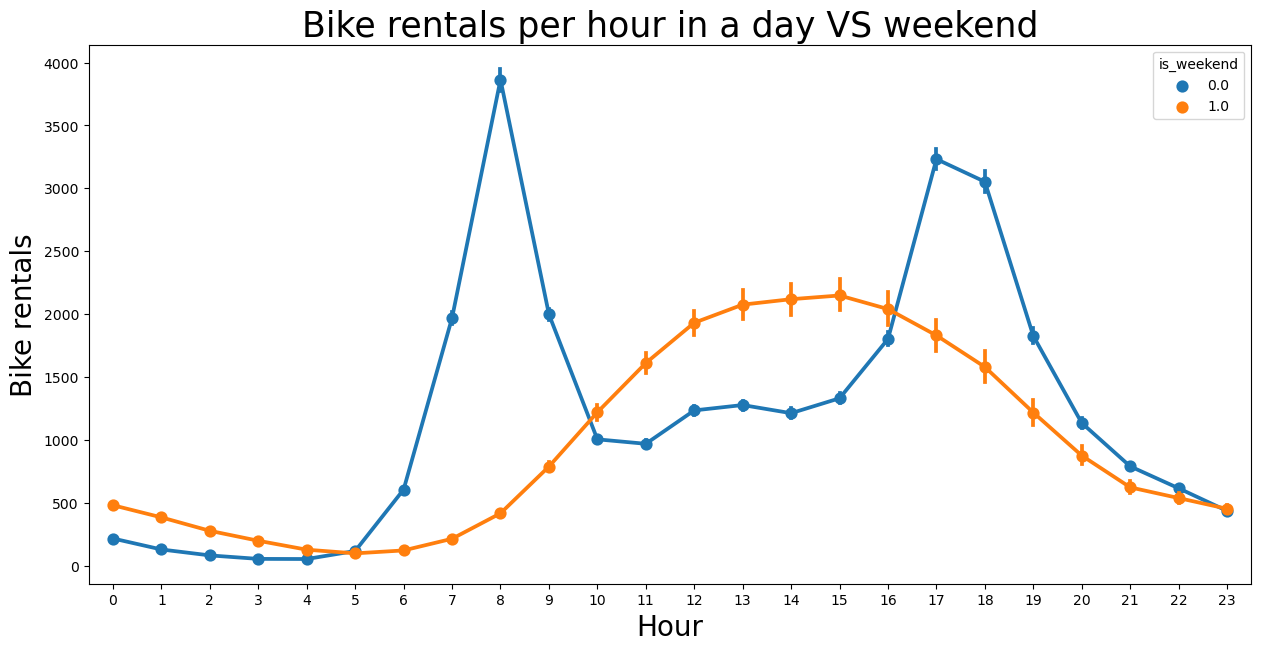

In [50]:
plt.figure(figsize=(15, 7))
ax = sns.pointplot(x='hour', y='cnt',hue='is_weekend',data=df)
ax.set_title("Bike rentals per hour in a day VS weekend", fontsize=25)
ax.set_xlabel("Hour", fontsize=20)
ax.set_ylabel('Bike rentals', fontsize=20)
plt.show()

<AxesSubplot:>

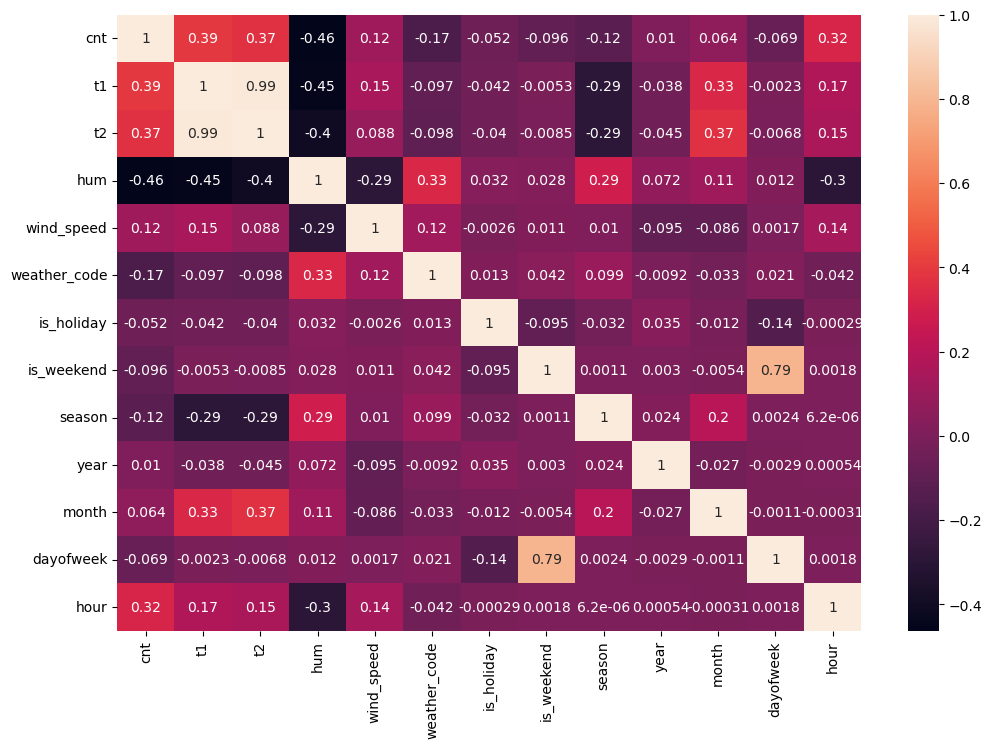

In [100]:
#4) Correlation between variables

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

array([[<AxesSubplot:title={'center':'timestamp'}>,
        <AxesSubplot:title={'center':'cnt'}>,
        <AxesSubplot:title={'center':'t1'}>,
        <AxesSubplot:title={'center':'t2'}>],
       [<AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'wind_speed'}>,
        <AxesSubplot:title={'center':'weather_code'}>,
        <AxesSubplot:title={'center':'is_holiday'}>],
       [<AxesSubplot:title={'center':'is_weekend'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'dayofweek'}>,
        <AxesSubplot:title={'center':'hour'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

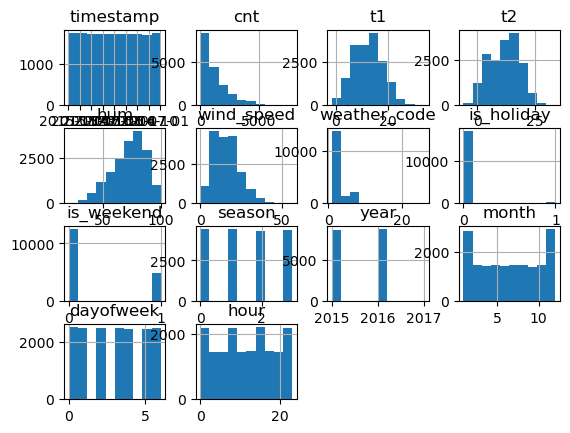

In [53]:
#5) Histograms

df.hist()

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

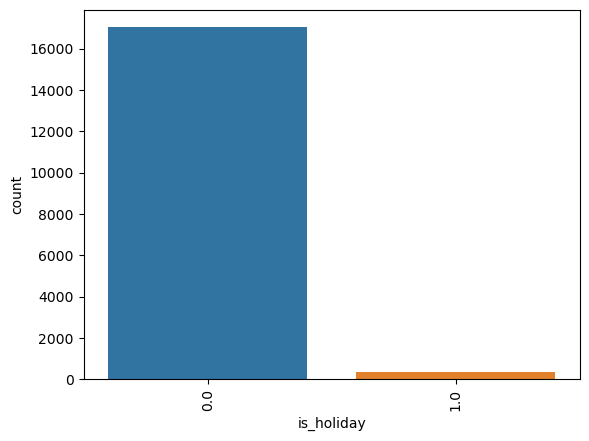

In [54]:
#6) Analysis on ‘is_holiday’/’is_weekend’

sns.countplot(data=df, x="is_holiday")
plt.xticks(rotation=90)

In [55]:
df["is_holiday"].value_counts()

0.0    17030
1.0      384
Name: is_holiday, dtype: int64

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

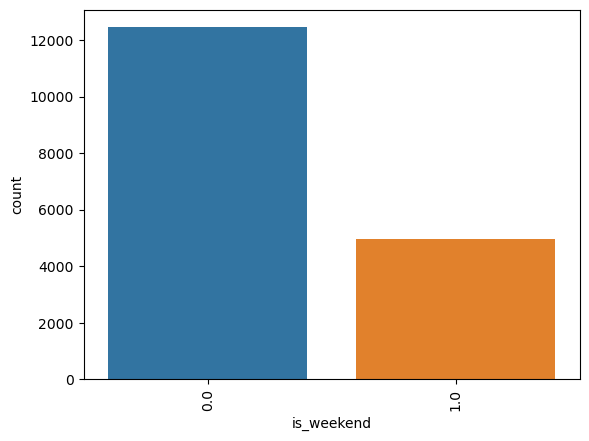

In [56]:
sns.countplot(data=df, x="is_weekend")
plt.xticks(rotation=90)

In [57]:
df["is_weekend"].value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

<AxesSubplot:>

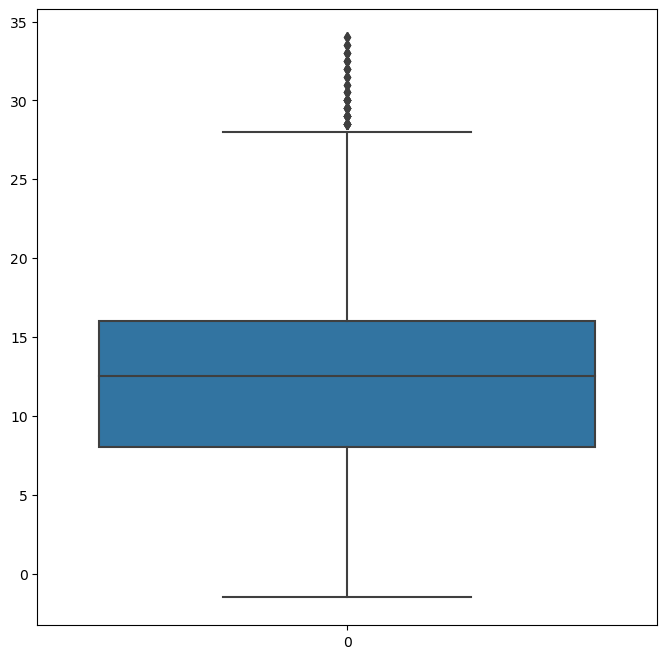

In [58]:
#7) Analysis on temperature (t1 - actual - and t2 - perceived)

plt.figure(figsize=(8,8))
sns.boxplot(data=df["t1"])

/Users/niccolocomar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='t1', ylabel='Density'>

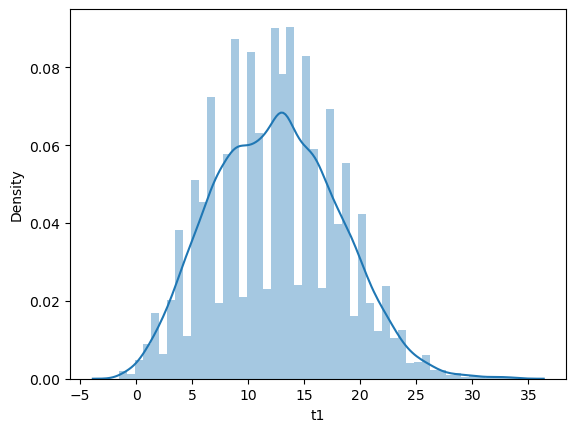

In [59]:
sns.distplot(df.t1, hist=True, kde=True)

<AxesSubplot:>

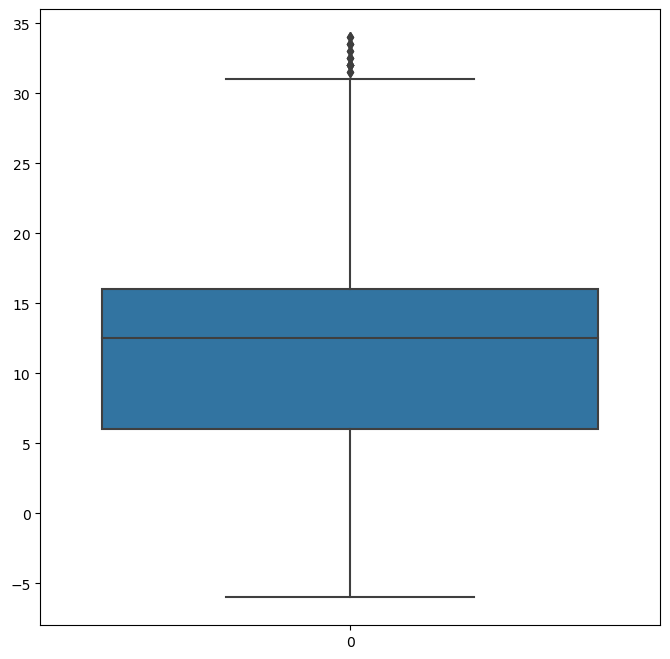

In [60]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df["t2"])

/Users/niccolocomar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='t2', ylabel='Density'>

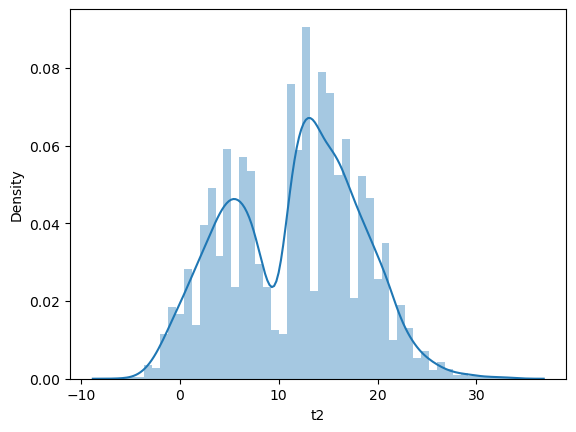

In [61]:
sns.distplot(df.t2, hist=True, kde=True)

<AxesSubplot:>

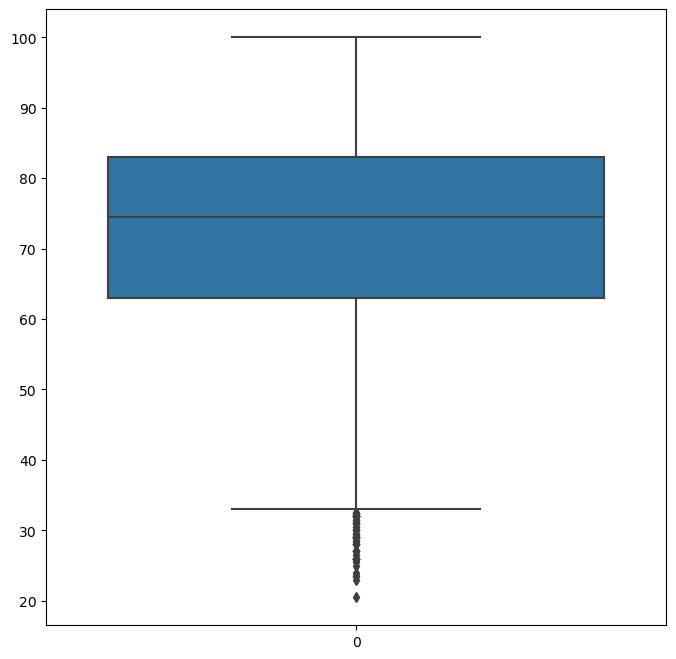

In [62]:
#8) Analysis on humidity

plt.figure(figsize=(8,8))
sns.boxplot(data=df["hum"])

/Users/niccolocomar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hum', ylabel='Density'>

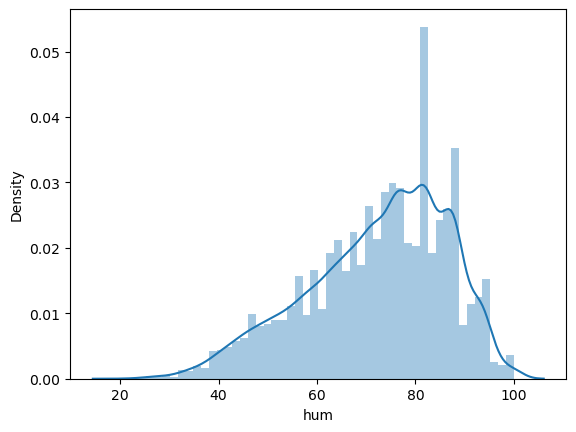

In [63]:
sns.distplot(df.hum, hist=True, kde=True)

<AxesSubplot:>

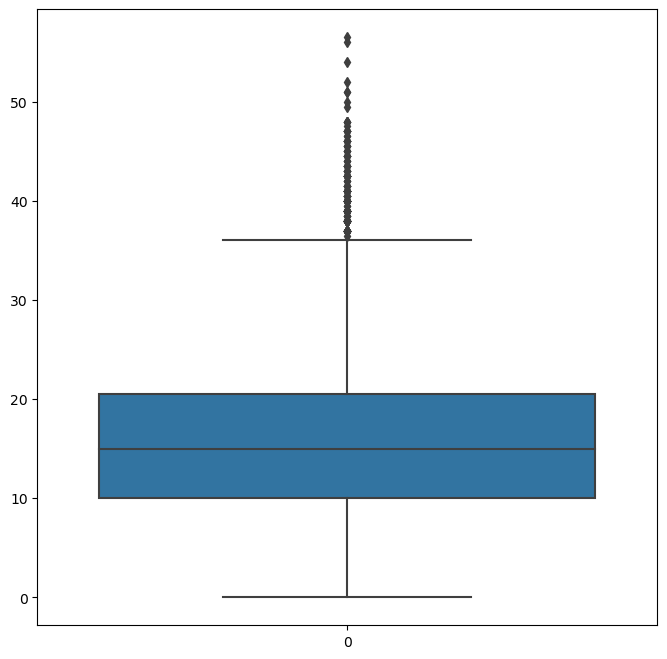

In [64]:
#9) Analysis on wind speed

plt.figure(figsize=(8,8))
sns.boxplot(data=df["wind_speed"])

/Users/niccolocomar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wind_speed', ylabel='Density'>

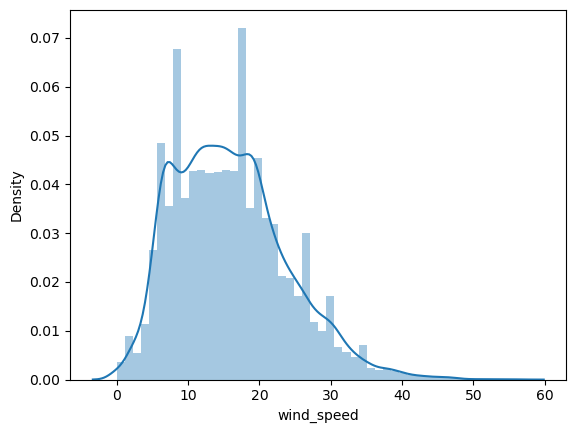

In [65]:
sns.distplot(df.wind_speed, hist=True, kde=True)

<AxesSubplot:xlabel='season', ylabel='count'>

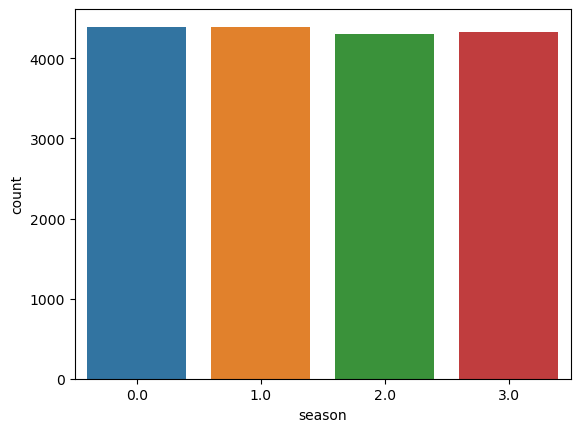

In [66]:
#10) Analysis on season

sns.countplot(x=df["season"])

In [67]:
df["season"].value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

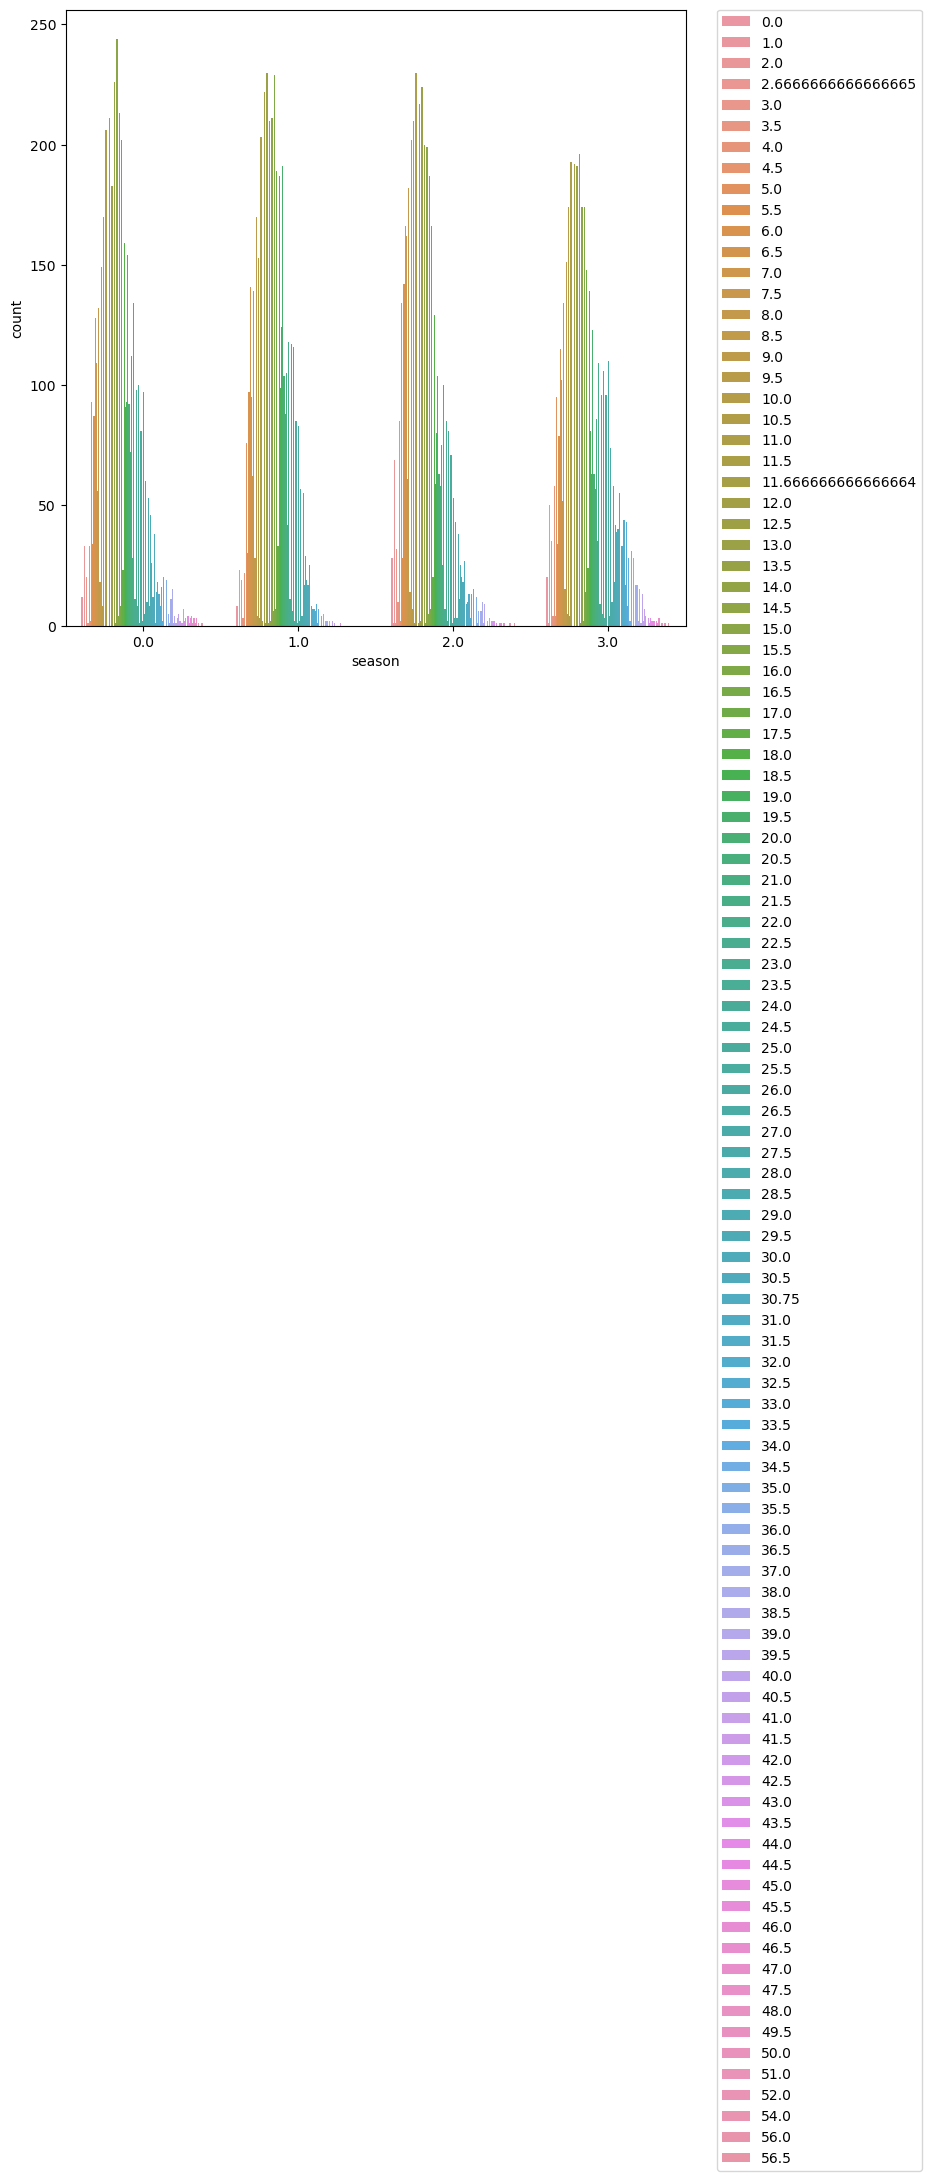

In [68]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x="season", hue="wind_speed")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

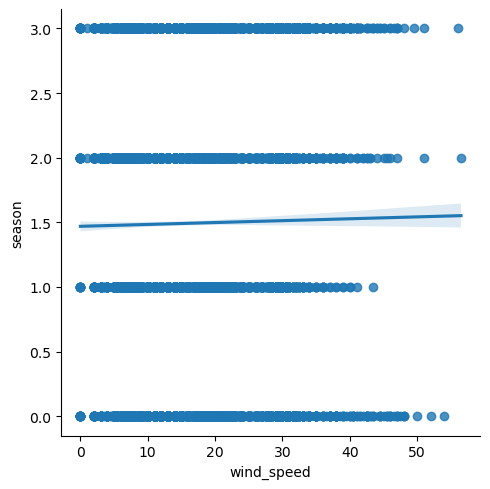

In [69]:
sns.lmplot(data=df, x="wind_speed", y="season" )

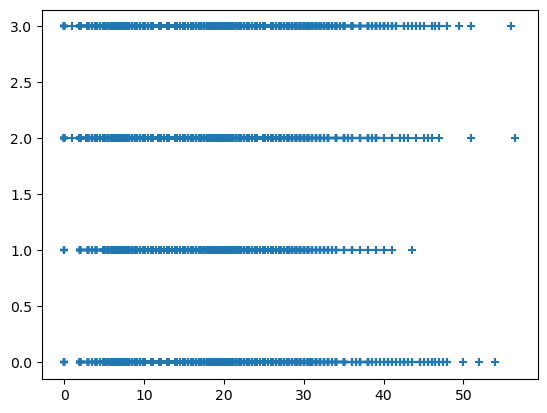

In [70]:
plt.scatter(x='wind_speed', y='season', marker='+', data=df)

<AxesSubplot:xlabel='season', ylabel='count'>

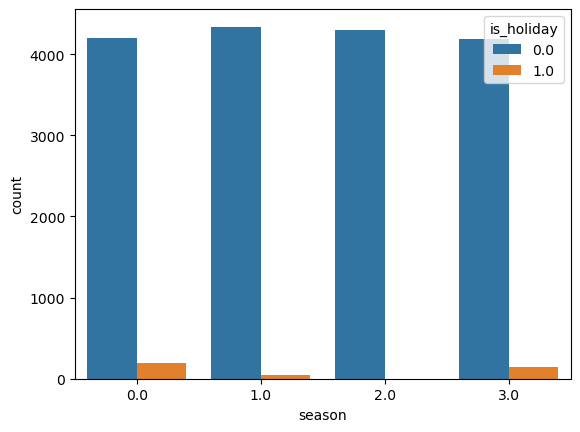

In [71]:
sns.countplot(data=df, x="season", hue="is_holiday")

<AxesSubplot:xlabel='season', ylabel='count'>

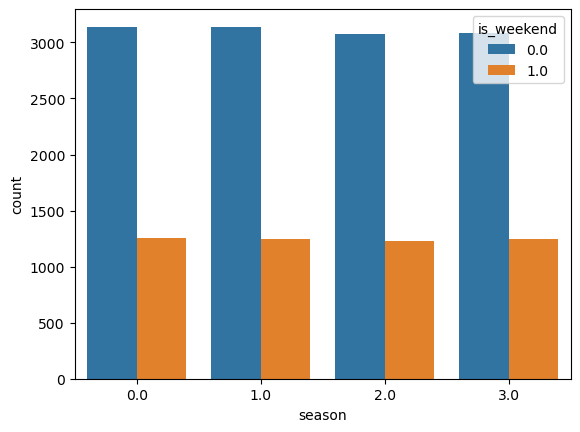

In [72]:
sns.countplot(data=df, x="season", hue="is_weekend")

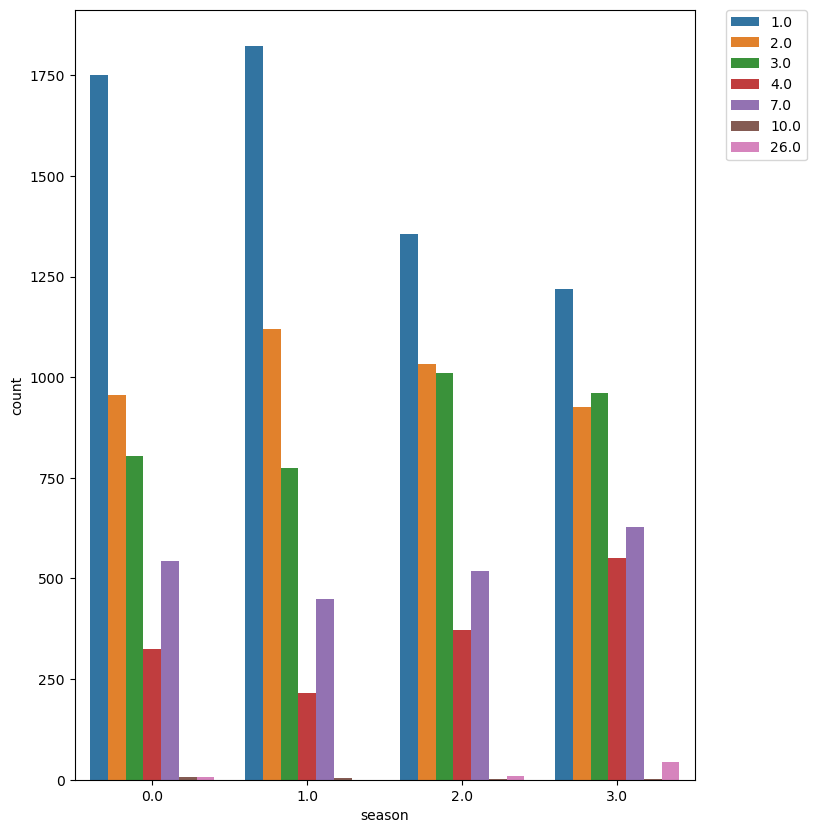

In [73]:
plt.figure(figsize=(8,10))
sns.countplot(data=df, x="season", hue="weather_code")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [74]:
#11) Analysis on Weather code

df["weather_code"].value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

<AxesSubplot:xlabel='weather_code', ylabel='count'>

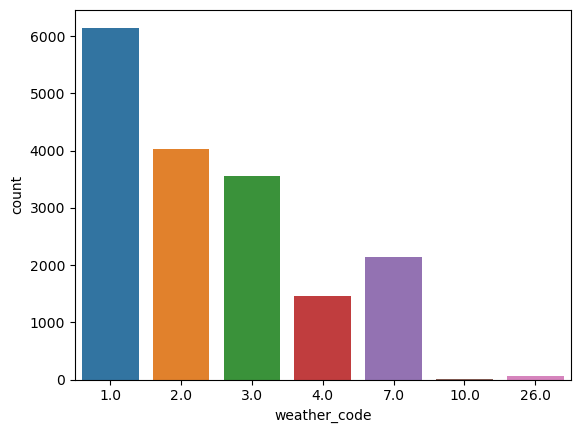

In [75]:
sns.countplot(data=df, x="weather_code")

<AxesSubplot:xlabel='weather_code', ylabel='count'>

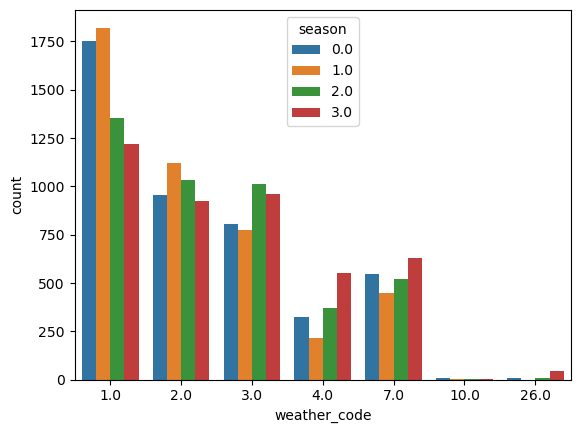

In [76]:
sns.countplot(data=df, x="weather_code", hue="season")

<Figure size 800x1000 with 0 Axes>

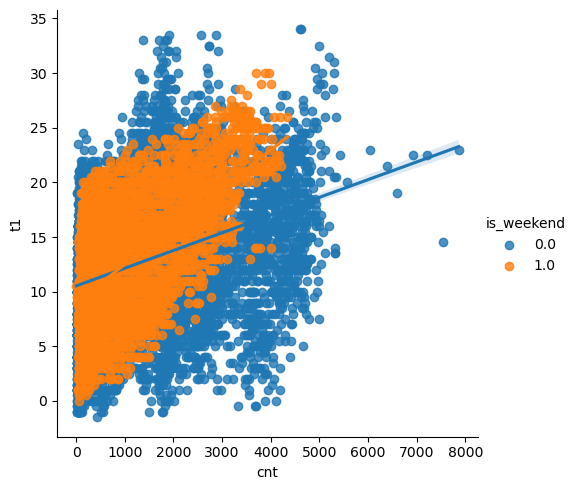

In [77]:
#12) Analysis on correlation

#Correlation between Count (cnt) and Temperature (t1) - corr=0.39

plt.figure(figsize=(8,10))
sns.lmplot(x="cnt", y="t1", hue="is_weekend", data=df)

<AxesSubplot:xlabel='cnt', ylabel='t1'>

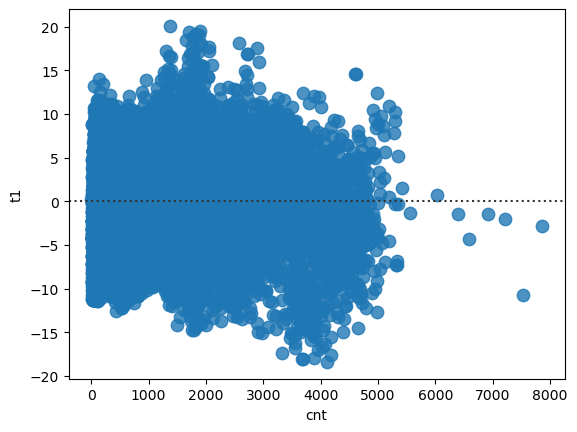

In [78]:
sns.residplot(x="cnt", y="t1", data=df,
              scatter_kws={"s": 80})

<Figure size 800x1000 with 0 Axes>

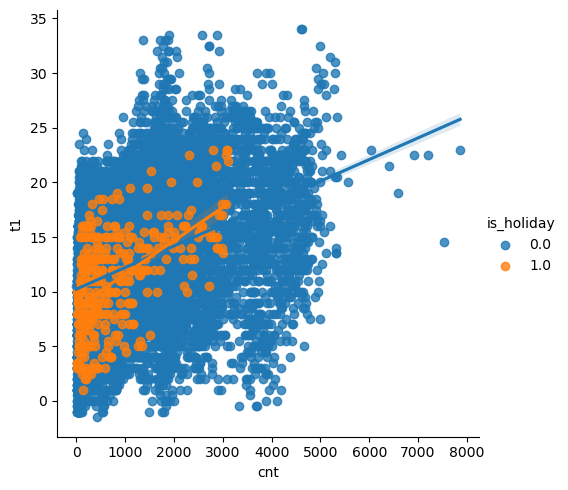

In [80]:
plt.figure(figsize=(8,10))
sns.lmplot(x="cnt", y="t1", hue="is_holiday", data=df)

<Figure size 800x1000 with 0 Axes>

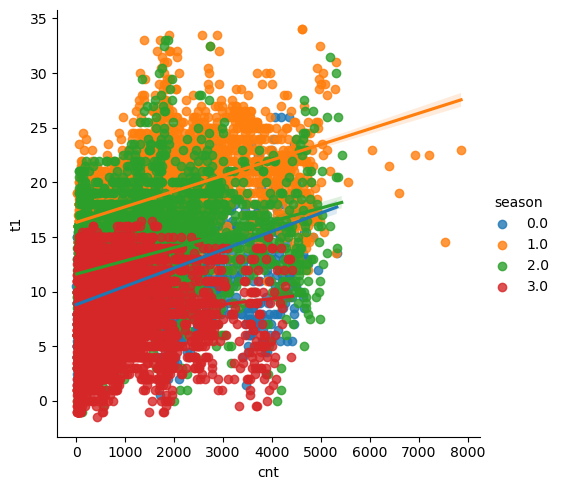

In [79]:
plt.figure(figsize=(8,10))
sns.lmplot(x="cnt", y="t1", hue="season", data=df)

<Figure size 800x1000 with 0 Axes>

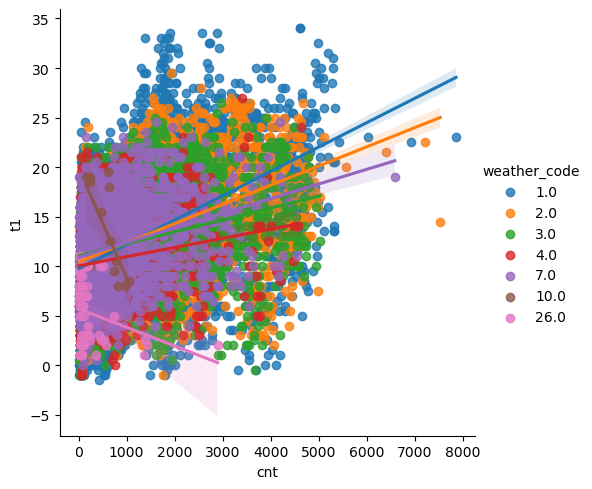

In [81]:
plt.figure(figsize=(8,10))
sns.lmplot(x="cnt", y="t1", hue="weather_code", data=df)

<Figure size 800x1000 with 0 Axes>

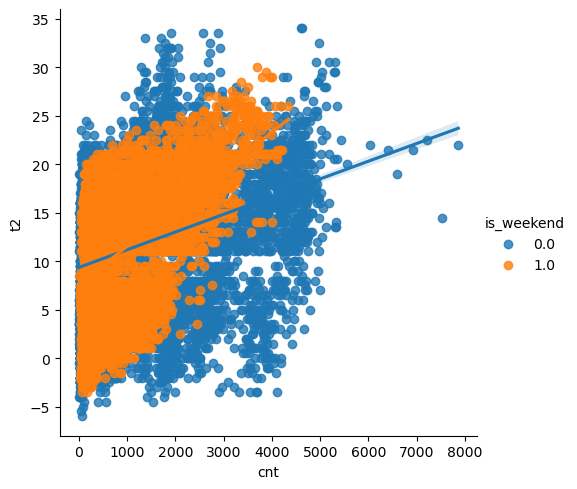

In [82]:
#Correlation between Count (cnt) and Perceived temperature (t2) - corr=0.37

plt.figure(figsize=(8,10))
sns.lmplot(x="cnt", y="t2", hue="is_weekend", data=df)

<AxesSubplot:xlabel='cnt', ylabel='t2'>

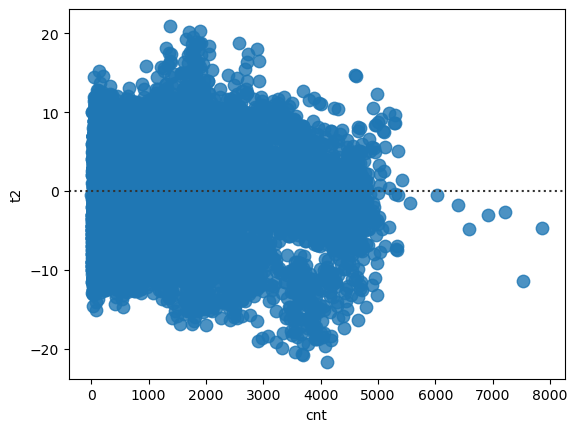

In [83]:
sns.residplot(x="cnt", y="t2", data=df,
              scatter_kws={"s": 80})

<Figure size 800x1000 with 0 Axes>

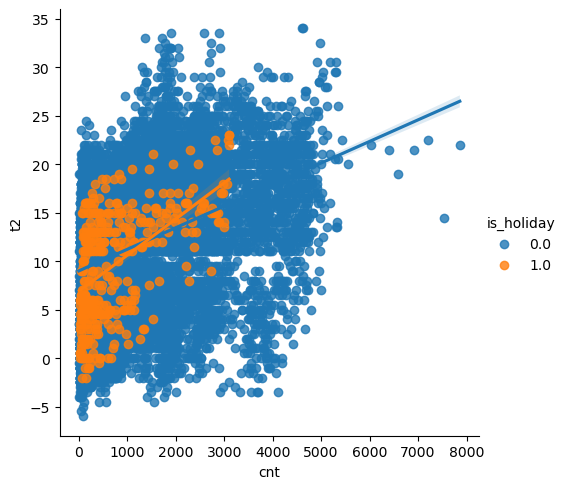

In [84]:
plt.figure(figsize=(8,10))
sns.lmplot(x="cnt", y="t2", hue="is_holiday", data=df)

<Figure size 800x1000 with 0 Axes>

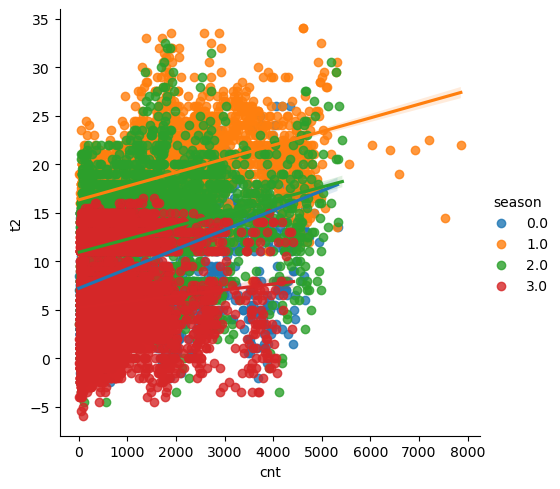

In [85]:
plt.figure(figsize=(8,10))
sns.lmplot(x="cnt", y="t2", hue="season", data=df)

<Figure size 800x1000 with 0 Axes>

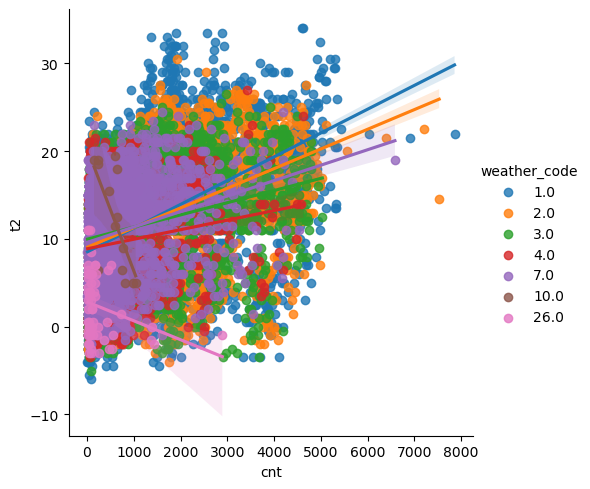

In [86]:
plt.figure(figsize=(8,10))
sns.lmplot(x="cnt", y="t2", hue="weather_code", data=df)

<Figure size 800x1000 with 0 Axes>

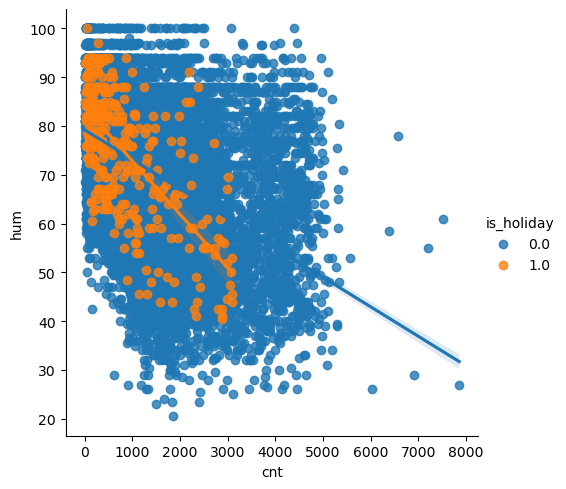

In [87]:
#Correlation between Count and humidity - corr=-0.46

plt.figure(figsize=(8,10))
sns.lmplot(x="cnt", y="hum", hue="is_holiday", data=df)

<AxesSubplot:xlabel='cnt', ylabel='hum'>

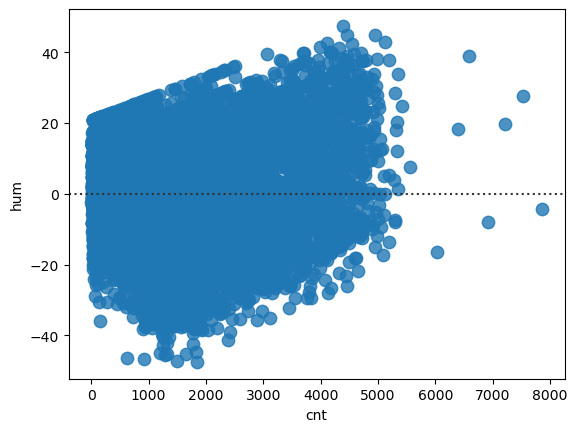

In [88]:
sns.residplot(x="cnt", y="hum", data=df,
              scatter_kws={"s": 80})

<Figure size 800x1000 with 0 Axes>

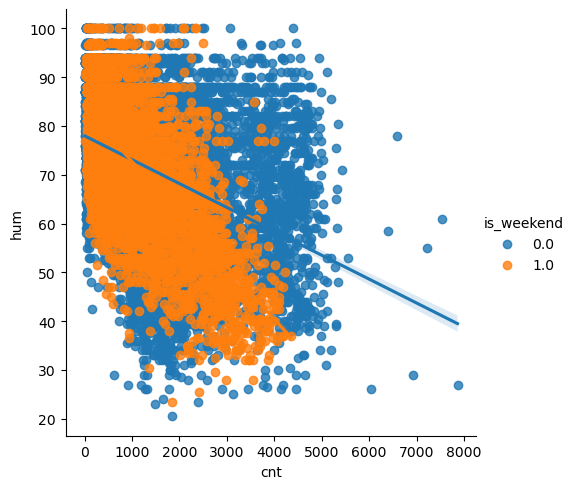

In [89]:
plt.figure(figsize=(8,10))
sns.lmplot(x="cnt", y="hum", hue="is_weekend", data=df)

<Figure size 800x1000 with 0 Axes>

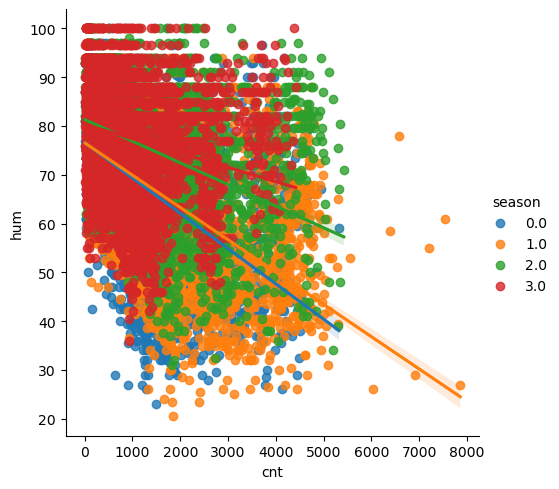

In [90]:
plt.figure(figsize=(8,10))
sns.lmplot(x="cnt", y="hum", hue="season", data=df)

<Figure size 800x1000 with 0 Axes>

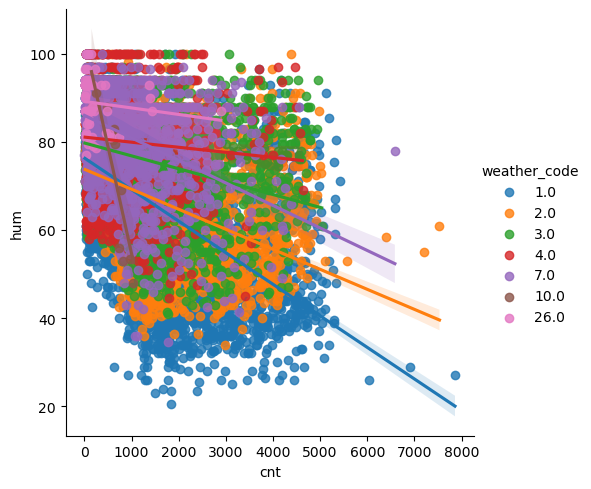

In [91]:
plt.figure(figsize=(8,10))
sns.lmplot(x="cnt", y="hum", hue="weather_code", data=df)

<Figure size 800x1000 with 0 Axes>

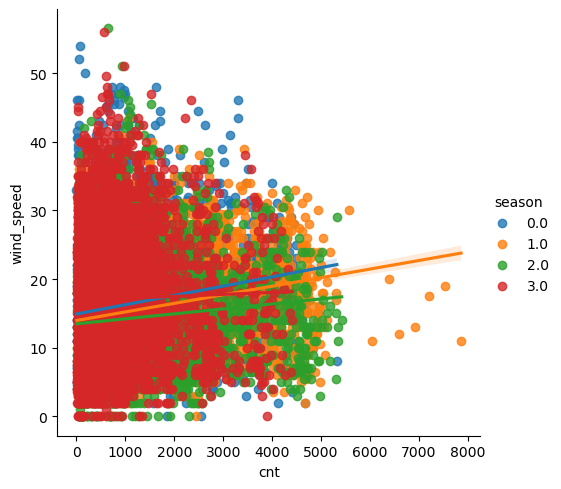

In [92]:
#Correlation between Count and wind speed - corr=0.12

plt.figure(figsize=(8,10))
sns.lmplot(x="cnt", y="wind_speed", hue="season", data=df)

<AxesSubplot:xlabel='cnt', ylabel='wind_speed'>

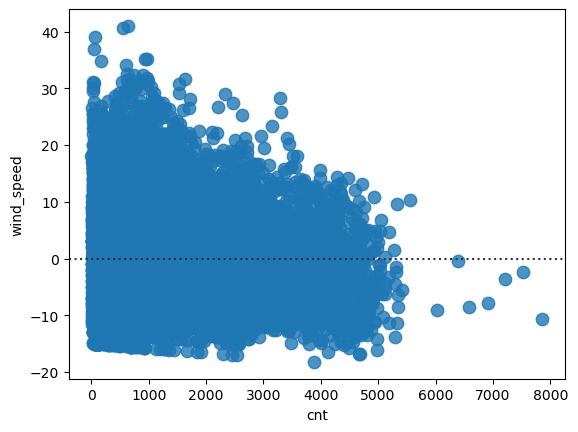

In [93]:
sns.residplot(x="cnt", y="wind_speed", data=df,
              scatter_kws={"s": 80})

<Figure size 800x1000 with 0 Axes>

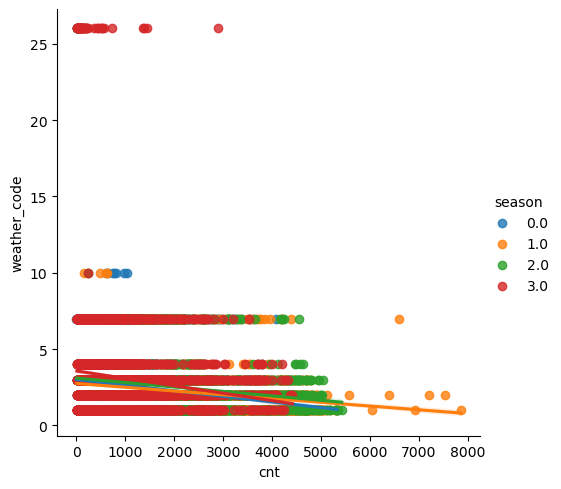

In [94]:
#Correlation between Count and weather code - corr=-0.17

plt.figure(figsize=(8,10))
sns.lmplot(x="cnt", y="weather_code", hue="season", data=df)

<AxesSubplot:xlabel='cnt', ylabel='weather_code'>

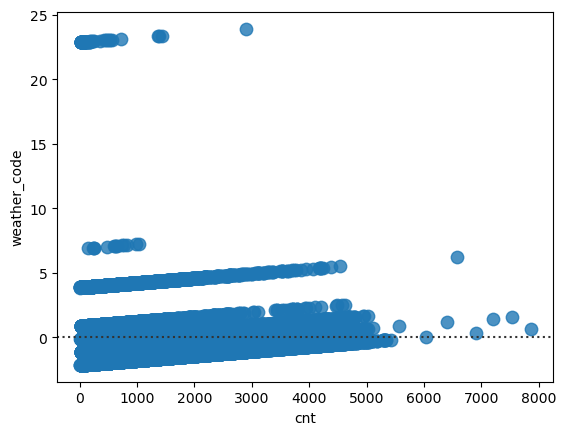

In [95]:
sns.residplot(x="cnt", y="weather_code", data=df,
              scatter_kws={"s": 80})

<Figure size 800x1000 with 0 Axes>

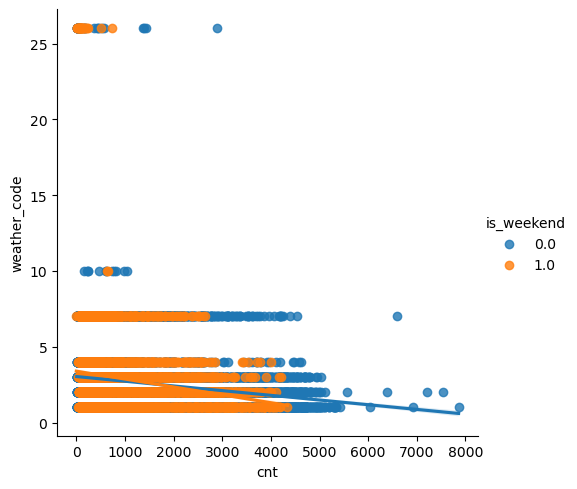

In [96]:
plt.figure(figsize=(8,10))
sns.lmplot(x="cnt", y="weather_code", hue="is_weekend", data=df)

<Figure size 800x1000 with 0 Axes>

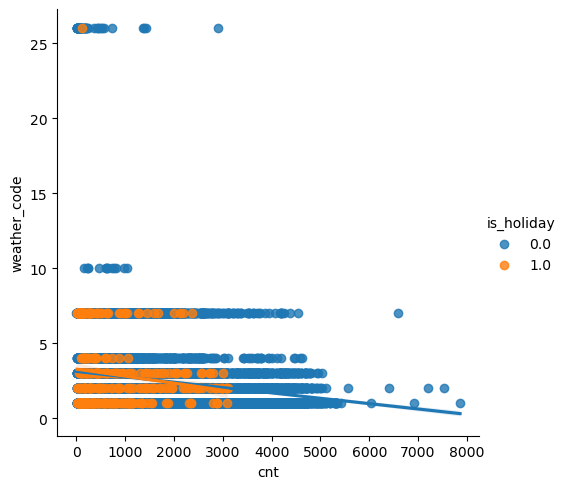

In [97]:
plt.figure(figsize=(8,10))
sns.lmplot(x="cnt", y="weather_code", hue="is_holiday", data=df)

<Figure size 800x1000 with 0 Axes>

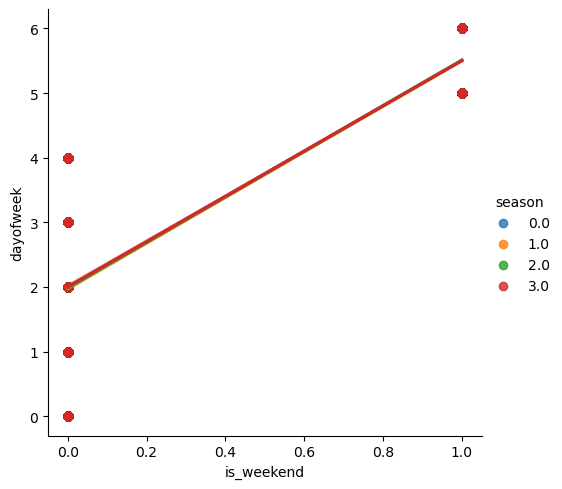

In [101]:
#Correlation between is_weekend and dayofweek - corr=0.79

plt.figure(figsize=(8,10))
sns.lmplot(x="is_weekend", y="dayofweek", hue="season", data=df)

<AxesSubplot:xlabel='is_weekend', ylabel='dayofweek'>

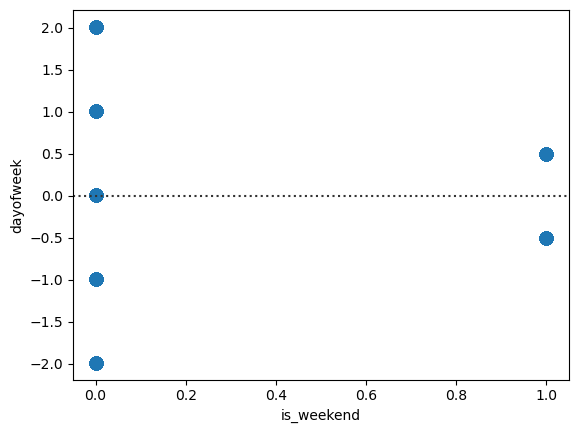

In [102]:
sns.residplot(x="is_weekend", y="dayofweek", data=df,
              scatter_kws={"s": 80})

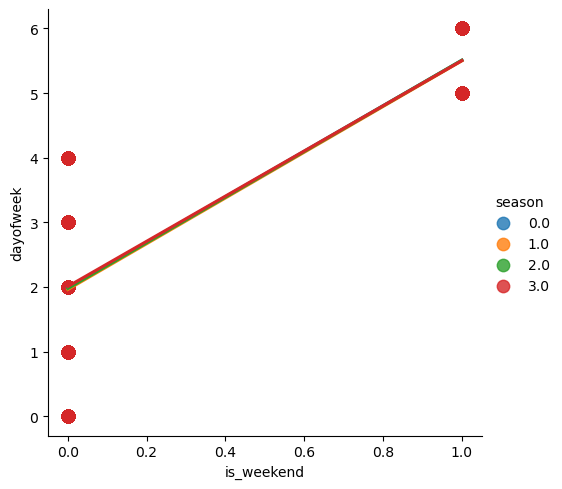

In [103]:
#Robust linear regression gives the same results

sns.lmplot(x="is_weekend", y="dayofweek", hue="season", data=df, robust=True, ci=None, scatter_kws={"s": 80})

<Figure size 800x1000 with 0 Axes>

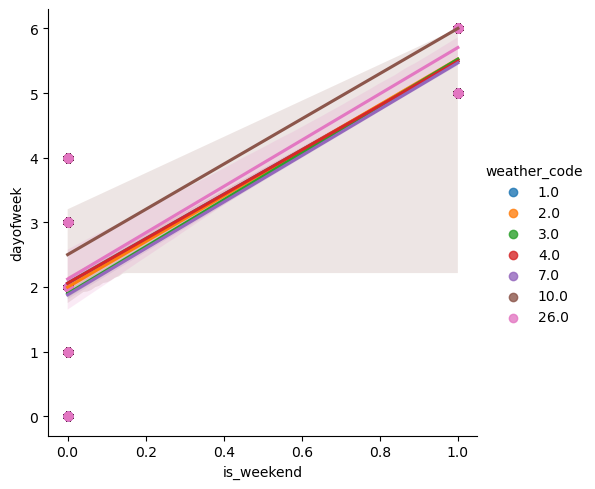

In [104]:
plt.figure(figsize=(8,10))
sns.lmplot(x="is_weekend", y="dayofweek", hue="weather_code", data=df)

<Figure size 800x1000 with 0 Axes>

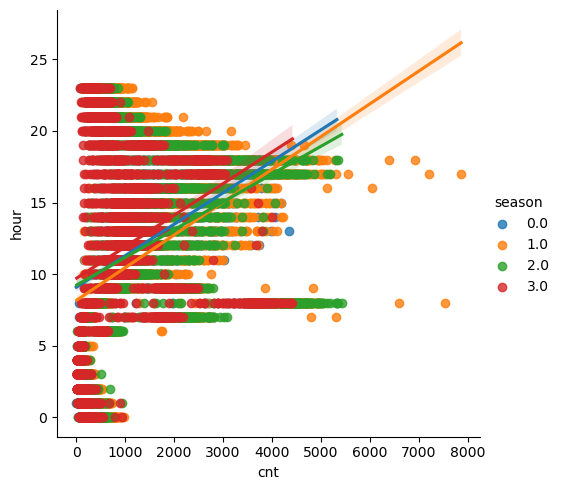

In [105]:
#Correlation between Count and weather code - corr=0.32

plt.figure(figsize=(8,10))
sns.lmplot(x="cnt", y="hour", hue="season", data=df)

<Figure size 800x1000 with 0 Axes>

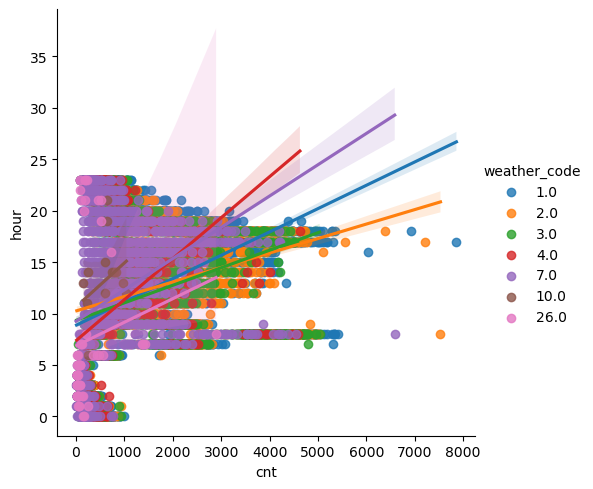

In [106]:
plt.figure(figsize=(8,10))
sns.lmplot(x="cnt", y="hour", hue="weather_code", data=df)